In [1]:
#bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ctl


In [2]:
# 1ºPasso - levantamento de requisito do sistema não compensado
#
#          função de Transferencia
# G(s) = 1/s(0.1s+1) => G(s) = 1/ 0.1s^2+ s

num = np.array([1])
den = np.array([0.1,1,0])
G_s = ctl.tf(num,den)
print(G_s)


     1
-----------
0.1 s^2 + s



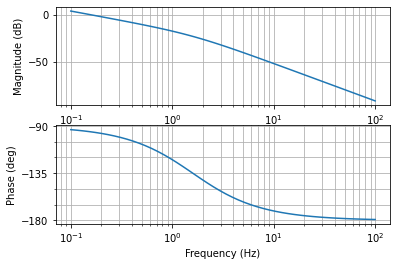

In [3]:
#bode do sistema não compensado

mag, phase, omega = ctl.bode(G_s)


In [4]:
gm, pm, wg, wp = ctl.margin(G_s)
print('==================SISTEMA NÃO COMPENSADO====================')
#print('Margem de ganho:',gm)
print('Margem de fase:',pm)
#print('Frequencia para margem de ganho', wg)
print('Frequencia para margem de fase',wp)
#kv = limite s->0 s* G(s) = 1
kv = 1
print('kv = limite s->0 s* G(s) = ',kv)
print('=======================================================')


==================SISTEMA NÃO COMPENSADO====================
Margem de fase: 84.31728748228102
Frequencia para margem de fase 0.9950854917683446
kv = limite s->0 s* G(s) =  1


In [5]:
# --------------------- requisito de novo Kv ------------
#                    NOVO_KV = limite s->0 s*G_s*kc
#                             20 = kc * 1
#                                 kc = 20 
#
#--------------------------------------------------------

kc = 20
kv = kc
kc_db = 20*np.log10(kc)
print('KC =',kc_db,"dB")

KC = 26.020599913279625 dB


In [6]:
#- 2º Passso - levantamento de dados do sistema utilizando Kc 
#
#                                  Diagrama de bloco do kc
#
#                imput -->()---|kc|--|G(s)|----->Output
#                         |                   |
#                         --------------------
#
G =kc*G_s
print(G)


    20
-----------
0.1 s^2 + s



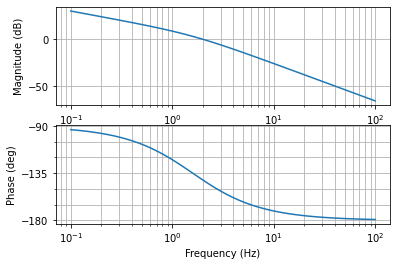

In [7]:
# bode do sistema compensado com  kc

mag, phase, omega = ctl.bode(G)

In [8]:
gm, pm, wg, wp = ctl.margin(G)
print('========================================================')
#print('Margem de ganho:',gm)
print('Margem de fase:',pm)
#print('Frequencia para margem de ganho', wg)
print('Frequencia para margem de fase',wp)
#kv = limite s->0 s* G(s) = 20
kv = 20
print('kv = limite s->0 s* G(s) = ',kv)
print('=======================================================')


Margem de fase: 38.66828249253447
Frequencia para margem de fase 12.496210676876531
kv = limite s->0 s* G(s) =  20


In [126]:
#============= calculo para o compensador de avanço de fase ====================
#
#                  MF desejado é 65 graus e kc = 20
#
#=============================================================================

margem_de_erro = 3
phi_m = round(float(65 - pm + margem_de_erro),2)
print("PHI_m =",phi_m)

#calculo de a
a = (1-np.sin(np.deg2rad(phi_m)))/(1+np.sin(np.deg2rad(phi_m)))
print("a =",a)

#calculo de kc/√(a) /ganho do controlador na frequencia wn
#
#                                   kc
#              Gc_wm = |Gc(jw)| =   ------
#                                   √a
#
#-=========================================================
Gc_wm = round(-20* np.log10 (kc/np.sqrt(a)),2)
print("20 log(Kc/√a)=",Gc_wm)


PHI_m = 29.33
a = 0.34242693423805476
20 log(Kc/√a)= -30.67


In [150]:
# ------------------- definindo de wn --------------------
#
#------------------------------------------------------

maglog = 20*np.log10(mag)

for i in range(0,np.size(mag)):                                   #percorre o vetor de mag gerado pela função bode                                               
    if  Gc_wm-1.1 <= maglog[i] < Gc_wm +1.2:                           #pega as wn entre os ganhos de  kc/√a +- 1                                                                     # salva os valores de omega no array t                                                                    
        wn = round(float(0.16 * omega[i]+8),2)
        print(wn)



21.97


In [151]:
#================== Descobrindo T ===============================

T = round(1/(np.sqrt(a)*wn),2)
print(T)

0.08



  1.6 s + 20
-------------
0.02739 s + 1



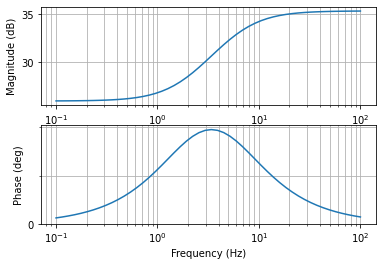

In [152]:
#============= Montando o compensador com base nos dados obtidos
#
#                              Ts + 1
#             C(s) = kc --------------------
#                             aTs + 1
#
#=================================================================
num = np.array([T,1])
den = np.array([a*T,1])
C_s = ctl.tf(kc*num,den)
print(C_s)
magc_s, phasec_s, omegac_s = ctl.bode(C_s)


          1.6 s + 20
-----------------------------
0.002739 s^3 + 0.1274 s^2 + s



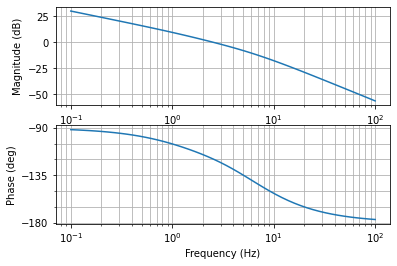

In [153]:
#====================== sistema compensad0 ======================
s_compensado = G_s * C_s
print(s_compensado)

magc, phasec, omegac = ctl.bode(s_compensado)
gmc, pmc, wgc, wpc = ctl.margin(s_compensado)

In [154]:
print("MF =",round(pmc,2),"Graus")
print("kv =",kv)

MF = 60.56 Graus
kv = 20


Para deixar o MF mais proximo de 65 optou-se por adcionar + 8Hz a frequencia wn, o wn anterior era de 56 graus.